## Outliers Assignment - Sri Das

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
states_df = pd.read_csv('states_all.csv')

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [3]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


#### Visual inspection of outliers using Histogram and Boxplots

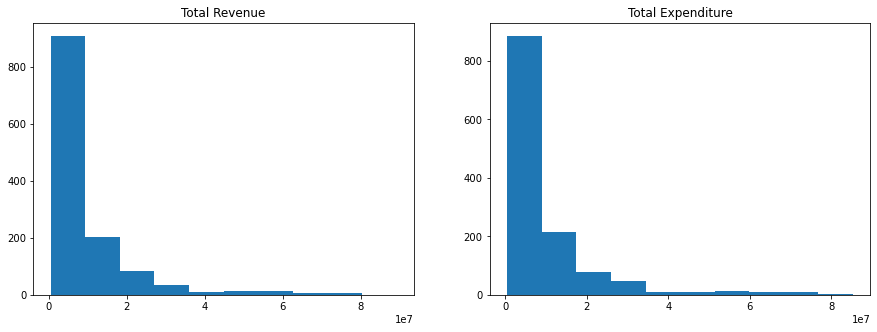

In [4]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(states_df['TOTAL_REVENUE'])
plt.title('Total Revenue')
plt.subplot(1,2,2)
plt.hist(states_df['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure')
plt.show()

In [5]:
states_df.dropna(inplace=True)

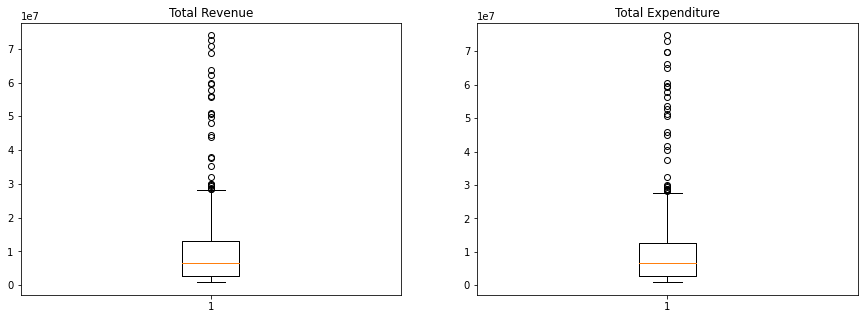

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(states_df['TOTAL_REVENUE'])
plt.title('Total Revenue')
plt.subplot(1,2,2)
plt.boxplot(states_df['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure')
plt.show()

Looking the histogram and boxplots of these two variables we can easily conclude that there are outliers in both the variables. To corroborate this observation we will use the z-score method to detect the outliers below.

In [7]:
# Making a copy of the date for later questions
states_df_copy = states_df.copy()

#### Detecting outliers using Z score

In [8]:
zscores_TR = zscore(states_df['TOTAL_REVENUE'])

for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("Number of outliers is: {}".format(len((np.where(zscores_TR > i)[0]))))

The score threshold is: 1
Number of outliers is: 40
The score threshold is: 2
Number of outliers is: 19
The score threshold is: 3
Number of outliers is: 13
The score threshold is: 4
Number of outliers is: 5


In [9]:
zscores_TE = zscore(states_df['TOTAL_EXPENDITURE'])

for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("Number of outliers is: {}".format(len((np.where(zscores_TE> i)[0]))))

The score threshold is: 1
Number of outliers is: 39
The score threshold is: 2
Number of outliers is: 19
The score threshold is: 3
Number of outliers is: 13
The score threshold is: 4
Number of outliers is: 6


From the z-score values we can corroborate that the two variables do have outliers

### 2.  If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

We will use winsorization method to eliminate the outliers. We will use the dataframe states_df for this method

In [10]:
from scipy.stats.mstats import winsorize

In [11]:
winsorizing_TR= winsorize(np.array(states_df['TOTAL_REVENUE']), (0.10, 0.10))

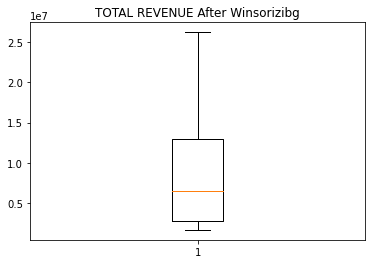

In [12]:
plt.boxplot(winsorizing_TR)
plt.title('TOTAL REVENUE After Winsorizibg')
plt.show()

In [13]:
winsorizing_TE= winsorize(np.array(states_df['TOTAL_EXPENDITURE']), (0.10, 0.10))

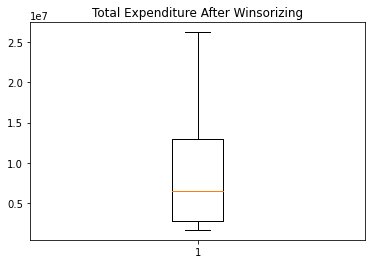

In [14]:
plt.boxplot(winsorizing_TR)
plt.title('Total Expenditure After Winsorizing')
plt.show()

From the two boxplots it can be seen that the winzorization has eliminated the outliers

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

In [15]:
# Using the copy of the un-winzorized data original data
states_df_copy['Budget_Deficit'] = states_df_copy['TOTAL_REVENUE'] - states_df_copy['TOTAL_EXPENDITURE']

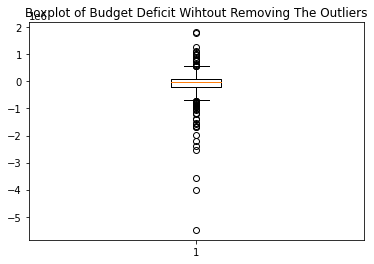

In [16]:
plt.boxplot(states_df_copy['Budget_Deficit'])
plt.title('Boxplot of Budget Deficit Wihtout Removing The Outliers')
plt.show()

In [17]:
zscores_bud = zscore(states_df_copy['Budget_Deficit'])

for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("Number of outliers is: {}".format(len((np.where(zscores_bud> i)[0]))))

The score threshold is: 1
Number of outliers is: 25
The score threshold is: 2
Number of outliers is: 3
The score threshold is: 3
Number of outliers is: 1
The score threshold is: 4
Number of outliers is: 0


As we can see from the boxplot and Z-score, there are quite a few outliers in the newly created 'Budget Deficit' variable without removing the outliers

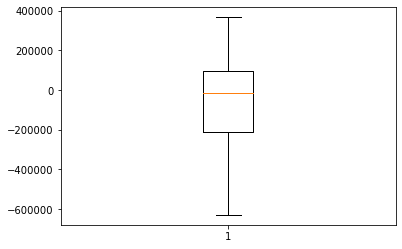

In [18]:
# Winsorozing the Budget Deficit Variable to remove outliers
winsorizing_bud_orig= winsorize(np.array(states_df_copy['Budget_Deficit']), (0.10, 0.10))
plt.boxplot(winsorizing_bud_orig)
plt.show()

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [19]:
# Using the winsorized data to create the budget deficit variable
states_df['Budget_Deficit'] = states_df['TOTAL_REVENUE'] - states_df['TOTAL_EXPENDITURE']

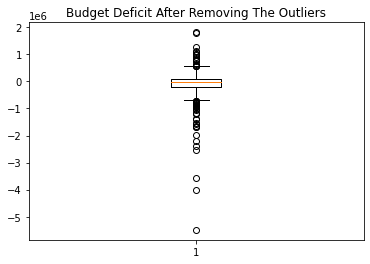

In [20]:
plt.boxplot(states_df['Budget_Deficit'])
plt.title('Budget Deficit After Removing The Outliers')
plt.show()

In [21]:
zscores_bud_out = zscore(states_df['Budget_Deficit'])

for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("Number of outliers is: {}".format(len((np.where(zscores_bud_out> i)[0]))))

The score threshold is: 1
Number of outliers is: 25
The score threshold is: 2
Number of outliers is: 3
The score threshold is: 3
Number of outliers is: 1
The score threshold is: 4
Number of outliers is: 0


From both the boxplot and the Z-score it can be observed that there are outliers in the newly created Budget Deficit Variable. Moreover the outliers are the same as what we observed in question 3. It seems winsorization has no effect on the outliers of the nee data. Perhaps because it is the difference of two variables. The outliers here are eliminated using Winsorization.

/Users/priyadas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


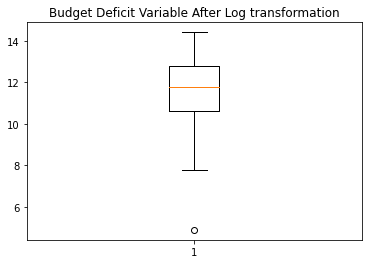

In [23]:
# Using the log transformation to remove the outliers
log_bud= np.log(states_df['Budget_Deficit'].dropna())
plt.boxplot(log_bud.dropna())
plt.title('Budget Deficit Variable After Log transformation')
plt.show()

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?


In [24]:
#Creating a new column for budget deficit (after removing outliers) in respective dataframes based on the method
states_df_copy['Win_bud_orig'] = winsorizing_bud_orig
states_df['log_bud'] = log_bud

In [25]:
print(states_df_copy['Win_bud_orig'].describe())

count       355.000000
mean     -66767.974648
std      284208.859242
min     -630307.000000
25%     -214081.500000
50%      -13282.000000
75%       95021.000000
max      366459.000000
Name: Win_bud_orig, dtype: float64


In [26]:
print(states_df['log_bud'].describe())

count    154.000000
mean      11.586621
std        1.534445
min        4.890349
25%       10.630457
50%       11.763307
75%       12.765337
max       14.412660
Name: log_bud, dtype: float64


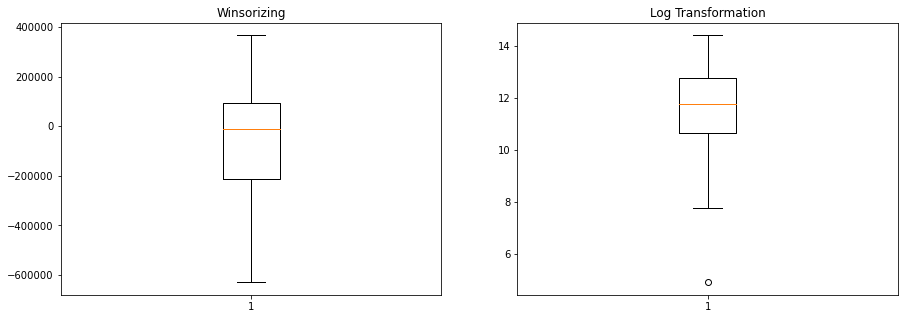

In [29]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(states_df_copy['Win_bud_orig'].dropna())
plt.title("Winsorizing")
plt.subplot(1,2,2)
plt.boxplot(states_df['log_bud'].dropna())
plt.title("Log Transformation")
plt.show()

The descriptive statistics and box plots for each method of eliminating outliers is presented above. Looking at the descriptive statistics, the main differences are that a) winsorizing method results in negative numbers (since budget deficit is difference between two values), this problem is eliminated in Log transformation and b) The scale of numbers in two methods is also different.   

### 6.  If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

Looking at the results so far, I would prefer the method used in the 4th question, log transformation to eliminate the outliers. It eliminates most of the outliers, the scale is easy to manage and there are no negative numbers to deal with